In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import graphviz as gv
from networkx.drawing.nx_agraph import graphviz_layout
import pandas as pd
import plotly
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go


from collections import OrderedDict

plotly.tools.set_credentials_file(username='pwendel3',api_key='nFUOFTfKSwcQg7nPoQOb')

%matplotlib inline

In [2]:
graphin=pd.read_excel('DFW_A_Edges.xlsx',skiprows=1)
graphin[['Walking Times','Driving Times','Bus Times','SkyLink Times']]=graphin[['Walking Times','Driving Times','Bus Times','SkyLink Times']].astype(str)

In [3]:
graphin.tail()

,x,y,Terminal,Gate,Nearest Gate,Node Type,Node Name,Walking Destinations,Walking Times,Driving Destinations,Driving Times,Bus Destinations,Bus Times,SkyLink Destinations,SkyLink Times
51,1.9,-2.6,A,37,A37,Parking,A37Parking,"A29BusStop,A35Ticketing,A36Checkpoint,A21Parking","3,3,4,6","A21Parking,A8Parking","3,3",NaN,nan,NaN,nan
52,-4.5,-0.4,A,13,A13,SkyLink,A13SkyLink,A13Gate,1,NaN,nan,NaN,nan,"A33SkyLink,A16SkyLink","4,4"
53,-3.4,1.6,A,16,A16,SkyLink,A16SkyLink,A16Gate,1,NaN,nan,NaN,nan,"A13SkyLink,A28SkyLink","4,4"
54,4.0,0.8,A,28,A28,SkyLink,A28SkyLink,A28Gate,1,NaN,nan,NaN,nan,"A16SkyLink,A33SkyLink","4,4"
55,5.0,-0.4,A,33,A33,SkyLink,A33SkyLink,A33Gate,1,NaN,nan,NaN,nan,"A28SkyLink,A13SkyLink","4,4"


In [4]:
anodes=list(graphin['Node Name'])
agraph=nx.MultiDiGraph()
agraph.add_nodes_from(anodes)

In [5]:
posi=[(i[1]['x'],i[1]['y']) for i in graphin.iterrows()]
posi=dict(zip(anodes,posi))


#posi['A10Gate']
ntype=dict(zip(anodes,graphin['Node Type']))
ngate=dict(zip(anodes,graphin['Nearest Gate']))
nx.set_node_attributes(agraph,posi,'pos')
nx.set_node_attributes(agraph,ntype,'type')
nx.set_node_attributes(agraph,ngate,'ngate')

In [6]:
source='A6Gate'
dest=['A7Gate','A8Gate']
dist=[0.5,1]
etype='walk'
def edgefunk(source,dest,dist,etype):
    if dist!='nan':
        dest=dest.split(',')
        dist=dist.split(',')
        dist=[float(i) for i in dist]
        destdist=list(zip(dest,dist))
        #print(destdist)
        if (len(dest)>0) and (len(dest)==len(dist)):
            edgelist=[(source,i[0],i[1]) for i in destdist]
            agraph.add_weighted_edges_from(edgelist,weight='time',type=etype)
            typedict=[((source,i),{'type':etype}) for i in dest]
            typedict=dict(typedict)
            #print(typedict)
        #nx.set_edge_attributes(agraph,'type',typedict)
#agraph.edges(data=True,keys=True)

In [7]:
graphin.columns

Index(['x', 'y', 'Terminal', 'Gate', 'Nearest Gate', 'Node Type', 'Node Name',
       'Walking Destinations', 'Walking Times', 'Driving Destinations',
       'Driving Times', 'Bus Destinations', 'Bus Times',
       'SkyLink Destinations', 'SkyLink Times'],
      dtype='object')

In [8]:
#graphin.head().apply(lambda x:edgefunk(x['Node Name'],x['Walking Destinations'],x['Walking Times'],'walk'))
for i,row in graphin.iterrows():
    #print(row)
    edgefunk(row['Node Name'],row['Walking Destinations'],row['Walking Times'],'walk')
    edgefunk(row['Node Name'],row['Bus Destinations'],row['Bus Times'],'bus')
    edgefunk(row['Node Name'],row['Driving Destinations'],row['Driving Times'],'drive')
    edgefunk(row['Node Name'],row['SkyLink Destinations'],row['SkyLink Times'],'sky')    

In [9]:
agraph.edges(data=True)

OutMultiEdgeDataView([('A6Gate', 'A7Gate', {'type': 'walk', 'time': 0.5}), ('A7Gate', 'A6Gate', {'type': 'walk', 'time': 0.5}), ('A7Gate', 'A8Gate', {'type': 'walk', 'time': 0.5}), ('A8Gate', 'A7Gate', {'type': 'walk', 'time': 0.5}), ('A8Gate', 'A9Gate', {'type': 'walk', 'time': 0.5}), ('A8Gate', 'A8Restroom', {'type': 'walk', 'time': 0.5}), ('A9Gate', 'A8Gate', {'type': 'walk', 'time': 0.5}), ('A9Gate', 'A10Gate', {'type': 'walk', 'time': 0.5}), ('A10Gate', 'A9Gate', {'type': 'walk', 'time': 0.5}), ('A10Gate', 'A11Gate', {'type': 'walk', 'time': 0.5}), ('A11Gate', 'A10Gate', {'type': 'walk', 'time': 0.5}), ('A11Gate', 'A13Gate', {'type': 'walk', 'time': 0.5}), ('A11Gate', 'A11Checkpoint', {'type': 'walk', 'time': 1.0}), ('A13Gate', 'A11Gate', {'type': 'walk', 'time': 0.5}), ('A13Gate', 'A14Gate', {'type': 'walk', 'time': 0.5}), ('A13Gate', 'A13SkyLink', {'type': 'walk', 'time': 1.0}), ('A14Gate', 'A13Gate', {'type': 'walk', 'time': 0.5}), ('A14Gate', 'A15Gate', {'type': 'walk', 'time'

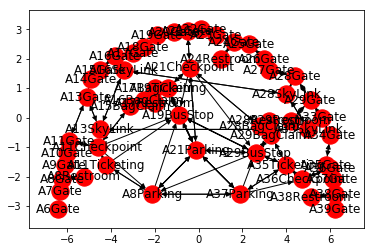

In [10]:
nx.draw_networkx(agraph,pos=posi)

In [11]:
def plotfig(graphin=agraph,dest=None,titlein='Terminal A Connected Graph'): 
    gate_trace = go.Scatter(
        name='Gate',
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            size=10,
            symbol=1,
            color='black')
    )

    rest_trace = go.Scatter(
        name='Restroom',
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            size=10,
            symbol=3,
            color='black')
    )

    check_trace = go.Scatter(
        name='Security<br>Checkpoint',
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            size=10,
            symbol=5,
            color='black')
    )

    tick_trace = go.Scatter(
        name='Ticket<br>Counter',
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            size=10,
            symbol=13,
            color='black')
    )

    bag_trace = go.Scatter(
        name='Bag Claim',
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            size=10,
            symbol=19,
            color='black')
    )

    bus_trace = go.Scatter(
        name='Bus Stop',
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            size=10,
            symbol=21,
            color='black')
    )

    park_trace = go.Scatter(
        name='Parking',
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            size=10,
            symbol=25,
            color='black')
    )

    term_trace = go.Scatter(
        name='SkyLink',
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            size=10,
            symbol=25,
            color='black')
    )



    symbdict={'Gate':gate_trace,
             'Restroom':rest_trace,
             'Checkpoint':check_trace,
             'Ticketing':tick_trace,
             'BagClaim':bag_trace,
             'BusStop':bus_trace,
             'Parking':park_trace,
             'SkyLink':term_trace}
    
    #node_trace['marker']['symbol']=[]
    for node in graphin.nodes():
        node_type=graphin.node[node]['type']
        node_trace=symbdict[node_type]
        x, y = graphin.node[node]['pos']
        node_trace['x'].append(x)
        node_trace['y'].append(y)

        #node_trace['marker']['symbol'].append()
        if node_type=='Gate':
            caption='Gate '+graphin.node[node]['ngate']
        else:
            caption='Node Type: '+node_type+'<br>Nearest Gate: '+graphin.node[node]['ngate']
        node_trace['text'].append(caption)

    node_traces=[gate_trace,rest_trace,check_trace,tick_trace,bag_trace,bus_trace,park_trace,term_trace]
    
    walk_trace=go.Scatter(
        name='Walking',
        x=[],
        y=[],
        line=dict(width=1.5,color='black'),
        hoverinfo='text',
        mode='lines',
        text=[]
    )

    drive_trace=go.Scatter(
        name='Driving',
        x=[],
        y=[],
        line=dict(width=1.5,color='red'),
        hoverinfo='text',
        mode='lines',
        text=[]
    )

    bus_trace=go.Scatter(
        name='Bus',
        x=[],
        y=[],
        line=dict(width=1.5,color='blue'),
        hoverinfo='text',
        mode='lines',
        text=[]
    )

    sky_trace=go.Scatter(
        name='SkyLink',
        x=[],
        y=[],
        line=dict(width=1.5,color='green'),
        hoverinfo='text',
        mode='lines',
        text=[]
    )
    
    mid_trace=go.Scatter(
        name='',
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=go.Marker(opacity=0)
    )

    edge_dict={
        'walk':walk_trace,
        'drive':drive_trace,
        'bus':bus_trace,
        'sky':sky_trace
    }

    for edge in graphin.edges(data=True):
        #print(edge)
        edge_type=edge[2]['type']
        edge_trace=edge_dict[edge_type]
        x0,y0=graphin.node[edge[0]]['pos']
        x1,y1=graphin.node[edge[1]]['pos']
        edge_trace['x']+=[x0,x1,None]
        edge_trace['y']+=[y0,y1,None]
        mid_trace['x'].append((x0+x1)/2)
        mid_trace['y'].append((y0+y1)/2)
        #mid_trace['text']+=str(edge[2])
        caption=str(edge[0])+' to '+str(edge[1])+'<br>'+str(edge[2]['time'])+' min '+edge[2]['type']
        mid_trace['text'].append(caption)


    node_traces.append(walk_trace)
    node_traces.append(bus_trace)   
    node_traces.append(drive_trace)
    node_traces.append(sky_trace)
    
    node_traces.append(mid_trace)
    
    if dest:
        dest_node=agraph.nodes[dest]
        node_type=dest_node['type']
        pos=dest_node['pos']
        if node_type=='Gate':
            caption='Gate '+graphin.node[node]['ngate']
        else:
            caption='Node Type: '+node_type+'<br>Nearest Gate: '+graphin.node[node]['ngate']
        node_trace['text'].append(caption)
        dest_trace=go.Scatter(
        name='destination',
        x=pos[0],
        y=pos[1],
        text=caption,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            size=10,
            symbol=17,
            color='orange')
        )
        node_traces.append(dest_trace)
    
    fig=go.Figure(data=node_traces,
             layout=go.Layout(
                title=titlein,
                titlefont=dict(size=16),
                showlegend=True,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
            
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
    return(fig)

In [12]:
agraph.nodes['A8Gate']

{'ngate': 'A8', 'pos': (-6.2, -2.1), 'type': 'Gate'}

In [14]:
plotfig()

{'data': [{'hoverinfo': 'text',
   'marker': {'color': 'black', 'size': 10, 'symbol': 1},
   'mode': 'markers',
   'name': 'Gate',
   'text': ['Gate A6',
    'Gate A7',
    'Gate A8',
    'Gate A9',
    'Gate A10',
    'Gate A11',
    'Gate A13',
    'Gate A14',
    'Gate A15',
    'Gate A16',
    'Gate A17',
    'Gate A18',
    'Gate A19',
    'Gate A20',
    'Gate A21',
    'Gate A22',
    'Gate A23',
    'Gate A24',
    'Gate A25',
    'Gate A26',
    'Gate A27',
    'Gate A28',
    'Gate A29',
    'Gate A33',
    'Gate A34',
    'Gate A35',
    'Gate A36',
    'Gate A37',
    'Gate A38',
    'Gate A39'],
   'type': 'scatter',
   'x': [-6.4,
    -6.3,
    -6.2,
    -6.1,
    -6.0,
    -5.9,
    -5.1,
    -4.9,
    -4.5,
    -3.8,
    -3.0,
    -2.5,
    -1.9,
    -1.1,
    -0.5,
    0.1,
    0.8,
    1.6,
    2.3,
    3.0,
    3.2,
    4.4,
    5.1,
    5.6,
    6.0,
    5.8,
    6.0,
    6.1,
    6.2,
    6.2],
   'y': [-3.1,
    -2.5,
    -2.1,
    -1.6,
    -1.2,
    -0.8,
    0.

In [16]:
py.iplot(plotfig(),filename='Agraph')

In [17]:
#walk_trace

In [18]:
#node_traces.append(walk_trace)

In [22]:
drg=nx.DiGraph(((source, target, attr) for source, target, attr in agraph.edges(data=True) if attr['type'] == 'drive'))
ing=nx.DiGraph(((source, target, attr) for source, target, attr in agraph.edges(data=True) if attr['type'] != 'drive'))
gar=['A8Parking','A21Parking','A37Parking']


In [23]:
ndrgaph=[]
fills=[0.4,0.7,0.8]
def shortlendfw(entry,dest,rate=25,lowbound=0.7,days=3):
    patd=[nx.shortest_path(ing,i,dest,weight='time') for i in gar]
    #print(patd)
    lend=[nx.shortest_path_length(ing,i,dest,weight='time') for i in gar]
    #pating=[nx.shortest_path(ing,i,gate,weight='duration') for i in gar]
    #lening=[nx.shortest_path_length(ing,i,gate,weight='duration') for i in gar]
    pathdat=OrderedDict([('garage',gar),
                        ('path',patd),
                        ('length',lend)])
    pathout=pd.DataFrame.from_dict(pathdat)
    #pathout['total length']=pathout['length to garage']+pathout['length from garage']
    pathout['fill']=fills
    pathout['adjusted price']=lowbound*rate+pathout['fill']*(1-lowbound)*rate
    pathout['total']=pathout['adjusted price']*days
    subedges=[]
    for i, row in pathout.iterrows():
        subnodes=row['path']
    
        subedge=[]
        for j in range(len(subnodes)-1):
        
            subedge.append((subnodes[j],subnodes[j+1],0))
        subedges+=subedge
    
    suba=agraph.edge_subgraph(subedges)
  
    titlecap='Fastest Paths to '+dest+' from Each Lot'
    plotout=plotfig(suba,titlein=titlecap,dest=dest)
    #py.iplot(,filename='PathGraph')

    #pathg=dg.subgraph(pathout.head(1)[])
    return((plotout,pathout.sort_values('length')))

In [ ]:
subedges[1]
agraph.edges

In [ ]:
filsubedges=[]
for i in subedges:
    curr=agraph.edges[i]
    print(len(curr))

In [ ]:
nx.shortest_path(ing,'A8Parking','A28BagClaim',weight='time')[0]

In [25]:
lens=shortlendfw('a','A37Gate',rate=25,lowbound=0.7,days=3)
lens[1]

,garage,path,length,fill,adjusted price,total
2,A37Parking,"[A37Parking, A36Checkpoint, A36Gate, A37Gate]",24.5,0.8,23.50,70.50
1,A21Parking,"[A21Parking, A37Parking, A36Checkpoint, A36Gat...",30.5,0.7,22.75,68.25
0,A8Parking,"[A8Parking, A11Ticketing, A11Checkpoint, A11Ga...",32.5,0.4,20.50,61.50


In [26]:
py.iplot(lens[0],filename='PathGraph')

In [ ]:
#subnodes=[]
subedges=[]
for i, row in lens.iterrows():
    subnodes=row['path']
    #print(subnodes)
    subedge=[]
    for j in range(len(subnodes)-1):
        #print((subnodes[j],subnodes[j+1]))
        subedge.append((subnodes[j],subnodes[j+1],0))
    subedges+=subedge
#suba=agraph.subgraph(subnodes)
subedges

In [ ]:
suba=agraph.edge_subgraph(subedges)

In [ ]:
suba.edges(data=True)

In [ ]:
lens

In [ ]:
py.iplot(plotfig(suba,titlein='Fastest Paths to Gate from Each Lot',dest='A28Gate'),filename='PathGraph')


In [ ]:
    walk_trace=go.Scatter(
        name='Walking',
        x=[],
        y=[],
        line=dict(width=1.5,color='black'),
        hoverinfo='text',
        mode='lines',
        text=[]
    )

    drive_trace=go.Scatter(
        name='Driving',
        x=[],
        y=[],
        line=dict(width=1.5,color='red'),
        hoverinfo='text',
        mode='lines',
        text=[]
    )

    bus_trace=go.Scatter(
        name='Bus',
        x=[],
        y=[],
        line=dict(width=1.5,color='blue'),
        hoverinfo='text',
        mode='lines',
        text=[]
    )

    sky_trace=go.Scatter(
        name='SkyLink',
        x=[],
        y=[],
        line=dict(width=1.5,color='green'),
        hoverinfo='text',
        mode='lines',
        text=[]
    )

    edge_dict={
        'walk':walk_trace,
        'drive':drive_trace,
        'bus':bus_trace,
        'sky':sky_trace
    }

    for edge in graphin.edges(data=True):
        #print(edge)
        edge_type=edge[2]['type']
        edge_trace=edge_dict[edge_type]
        x0,y0=agraph.node[edge[0]]['pos']
        x1,y1=agraph.node[edge[1]]['pos']
        edge_trace['x']+=[x0,x1,None]
        edge_trace['y']+=[y0,y1,None]
        caption=str(edge[0])+' to '+str(edge[1])+'<br>'+str(edge[2]['time'])+' min '+edge[2]['type']
        edge_trace['text'].append(caption)


    node_traces.append(walk_trace)
    node_traces.append(bus_trace)   
    node_traces.append(drive_trace)

    node_traces.append(sky_trace)
    fig=go.Figure(data=node_traces,
             layout=go.Layout(
                title='<br>Terminal A Connected Graph',
                titlefont=dict(size=16),
                showlegend=True,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
            
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
    return(fig)